In [13]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture
import umap

In [30]:
CWD = os.getcwd()
DATA_DIR = os.path.join(CWD, "data")
master_filename = "Cannon.csv"

master_df = pd.read_csv(os.path.join(DATA_DIR, master_filename))
master_df = master_df.drop(columns=[master_df.columns[-1]]) # get rid of last column of NaNs
# master_df = master_df.iloc[0:1000]

In [34]:
fit = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
%time u = fit.fit_transform(master_df)

CPU times: user 19min 18s, sys: 26.8 s, total: 19min 45s
Wall time: 4min 58s


(164074, 2)


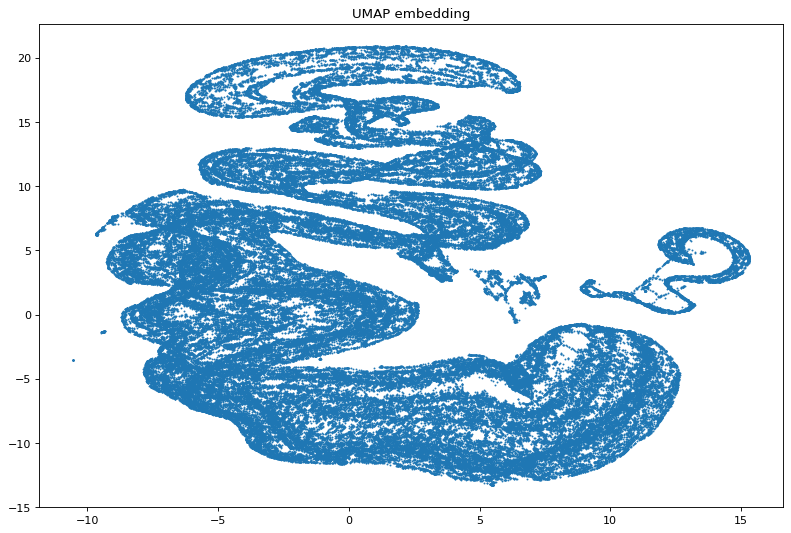

In [38]:
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(u[:,0], u[:,1], s=0.5)
plt.title('UMAP embedding')
print(u.shape)

In [39]:
clf = GaussianMixture(n_components=4, covariance_type='full')
clf.fit(u)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
# display predicted scores by the model as a contour plot
x = np.linspace(np.min(u[:,0]), np.max(u[:,0]))
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()